In [170]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') 

In [171]:
pwd

'/Users/denisdunn/Downloads'

In [172]:
df=pd.read_csv('cryptocurrencypricehistory/ethereum_dataset.csv')

In [173]:
bit=pd.read_csv('cryptocurrencypricehistory/bitcoin_dataset.csv')

In [260]:
bit.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [175]:
bit['Date'] = pd.to_datetime(bit['Date'])

In [228]:
bit['Date'] = bit['Date'].dt.normalize()


In [230]:
date=bit['Date'].tolist()

In [237]:
date_list=[]
for time in range(len(date)):
    date_list.append(str(date[time]))

In [241]:
date_list[0].split(' ')[0]

'2010-02-23'

In [242]:
time_list=[]
for num in range(len(date_list)):
    time_list.append(date_list[num].split(' ')[0])


In [244]:
bit['Date']=time_list

In [218]:
stocks_vix_bonds['Date'].tolist()

['2010-02-22',
 '2010-02-23',
 '2010-02-24',
 '2010-02-25',
 '2010-02-26',
 '2010-03-01',
 '2010-03-02',
 '2010-03-03',
 '2010-03-04',
 '2010-03-05',
 '2010-03-08',
 '2010-03-09',
 '2010-03-10',
 '2010-03-11',
 '2010-03-12',
 '2010-03-15',
 '2010-03-16',
 '2010-03-17',
 '2010-03-18',
 '2010-03-19',
 '2010-03-22',
 '2010-03-23',
 '2010-03-24',
 '2010-03-25',
 '2010-03-26',
 '2010-03-29',
 '2010-03-30',
 '2010-03-31',
 '2010-04-01',
 '2010-04-05',
 '2010-04-06',
 '2010-04-07',
 '2010-04-08',
 '2010-04-09',
 '2010-04-12',
 '2010-04-13',
 '2010-04-14',
 '2010-04-15',
 '2010-04-16',
 '2010-04-19',
 '2010-04-20',
 '2010-04-21',
 '2010-04-22',
 '2010-04-23',
 '2010-04-26',
 '2010-04-27',
 '2010-04-28',
 '2010-04-29',
 '2010-04-30',
 '2010-05-03',
 '2010-05-04',
 '2010-05-05',
 '2010-05-06',
 '2010-05-07',
 '2010-05-10',
 '2010-05-11',
 '2010-05-12',
 '2010-05-13',
 '2010-05-14',
 '2010-05-17',
 '2010-05-18',
 '2010-05-19',
 '2010-05-20',
 '2010-05-21',
 '2010-05-24',
 '2010-05-25',
 '2010-05-

In [177]:
bit.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [197]:
vix=pd.read_csv('^VIX (1).csv')

In [198]:
stocks=pd.read_csv('^GSPC (1).csv')

In [199]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-22,1110.000000,1112.290039,1105.380005,1108.010010,1108.010010,3814440000
1,2010-02-23,1107.489990,1108.579956,1092.180054,1094.599976,1094.599976,4521050000
2,2010-02-24,1095.890015,1106.420044,1095.500000,1105.239990,1105.239990,4168360000
3,2010-02-25,1101.239990,1103.500000,1086.020020,1102.939941,1102.939941,4521130000
4,2010-02-26,1103.099976,1107.239990,1097.560059,1104.489990,1104.489990,3945190000


In [200]:
bonds=pd.read_csv('^TNX (1).csv')

In [201]:
bonds = bonds.add_suffix('_bonds')

In [202]:
gold=pd.read_csv('GLD (1).csv')

In [249]:
gold=gold.add_suffix('_gold')

In [203]:
korea=pd.read_csv('^KS11 (1).csv')

In [250]:
korea=korea.add_suffix('_korea')

In [204]:
china=pd.read_csv('^HSI (1).csv')

In [251]:
china=china.add_suffix('_china')

In [205]:
vix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-22,20.160000,21.000000,19.590000,19.940001,19.940001,0
1,2010-02-23,20.389999,21.940001,20.059999,21.370001,21.370001,0
2,2010-02-24,21.230000,21.580000,20.219999,20.270000,20.270000,0
3,2010-02-25,22.030001,22.680000,20.059999,20.100000,20.100000,0
4,2010-02-26,19.879999,20.530001,19.320000,19.500000,19.500000,0


In [210]:
stocks_vix=pd.merge(stocks, vix, on='Date',suffixes=('_stocks','_vix'))

In [214]:
stocks_vix_bonds=pd.merge(stocks_vix,bonds,left_on='Date',right_on='Date_bonds')

In [245]:
bsdv=pd.merge(stocks_vix_bonds,bit,on='Date',how='outer')

In [252]:
bsdvg=pd.merge(bsdv,gold,left_on='Date',right_on='Date_gold')

In [254]:
bsdvgk=pd.merge(bsdvg,korea,left_on='Date',right_on='Date_korea')

In [256]:
markets=pd.merge(bsdvgk,china,left_on='Date',right_on='Date_china')

In [275]:
markets.columns

Index(['Date', 'Open_stocks', 'High_stocks', 'Low_stocks', 'Close_stocks',
       'Adj Close_stocks', 'Volume_stocks', 'Open_vix', 'High_vix', 'Low_vix',
       'Close_vix', 'Adj Close_vix', 'Volume_vix', 'Date_bonds', 'Open_bonds',
       'High_bonds', 'Low_bonds', 'Close_bonds', 'Adj Close_bonds',
       'Volume_bonds', 'btc_market_price', 'btc_total_bitcoins',
       'btc_market_cap', 'btc_trade_volume', 'btc_blocks_size',
       'btc_avg_block_size', 'btc_n_orphaned_blocks',
       'btc_n_transactions_per_block', 'btc_median_confirmation_time',
       'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction_percent',
       'btc_cost_per_transaction', 'btc_n_unique_addresses',
       'btc_n_transactions', 'btc_n_transactions_total',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_t

In [276]:
columns=['Open_stocks','High_stocks', 'Low_stocks','Adj Close_stocks','Open_vix', 'High_vix', 'Low_vix','Adj Close_vix','Date_bonds', 'Open_bonds',
       'High_bonds', 'Low_bonds','Adj Close_bonds','Date_gold', 'Open_gold',
       'High_gold', 'Low_gold', 'Adj Close_gold','Date_korea', 'Open_korea', 'High_korea', 'Low_korea','Adj Close_korea','Date_china', 'Open_china',
       'High_china', 'Low_china', 'Adj Close_china',]




In [277]:
markets.drop(columns, inplace=True,axis=1)

In [281]:
first=markets[['btc_market_price','Close_vix','Close_stocks','Close_gold','Close_korea','Close_bonds','Close_china']]

In [283]:
guts=markets[['btc_market_price','btc_total_bitcoins',
       'btc_market_cap', 'btc_trade_volume', 'btc_blocks_size',
       'btc_avg_block_size', 'btc_n_orphaned_blocks',
       'btc_n_transactions_per_block', 'btc_median_confirmation_time',
       'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction_percent',
       'btc_cost_per_transaction', 'btc_n_unique_addresses',
       'btc_n_transactions', 'btc_n_transactions_total',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd',]]

In [287]:
third=markets[['btc_market_price','btc_total_bitcoins',
       'btc_market_cap', 'btc_trade_volume', 'btc_blocks_size',
       'btc_avg_block_size', 'btc_n_orphaned_blocks',
       'btc_n_transactions_per_block']]

In [289]:
fourth=markets[['btc_market_price','btc_median_confirmation_time',
       'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction_percent',
       'btc_cost_per_transaction', 'btc_n_unique_addresses',
       'btc_n_transactions', 'btc_n_transactions_total',]]

In [291]:
fifth=markets[['btc_market_price','btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd']]

In [302]:
vol=markets[['btc_market_price','Volume_stocks','Volume_vix','Volume_bonds','btc_estimated_transaction_volume_usd','Volume_gold','Volume_korea','Volume_china']]

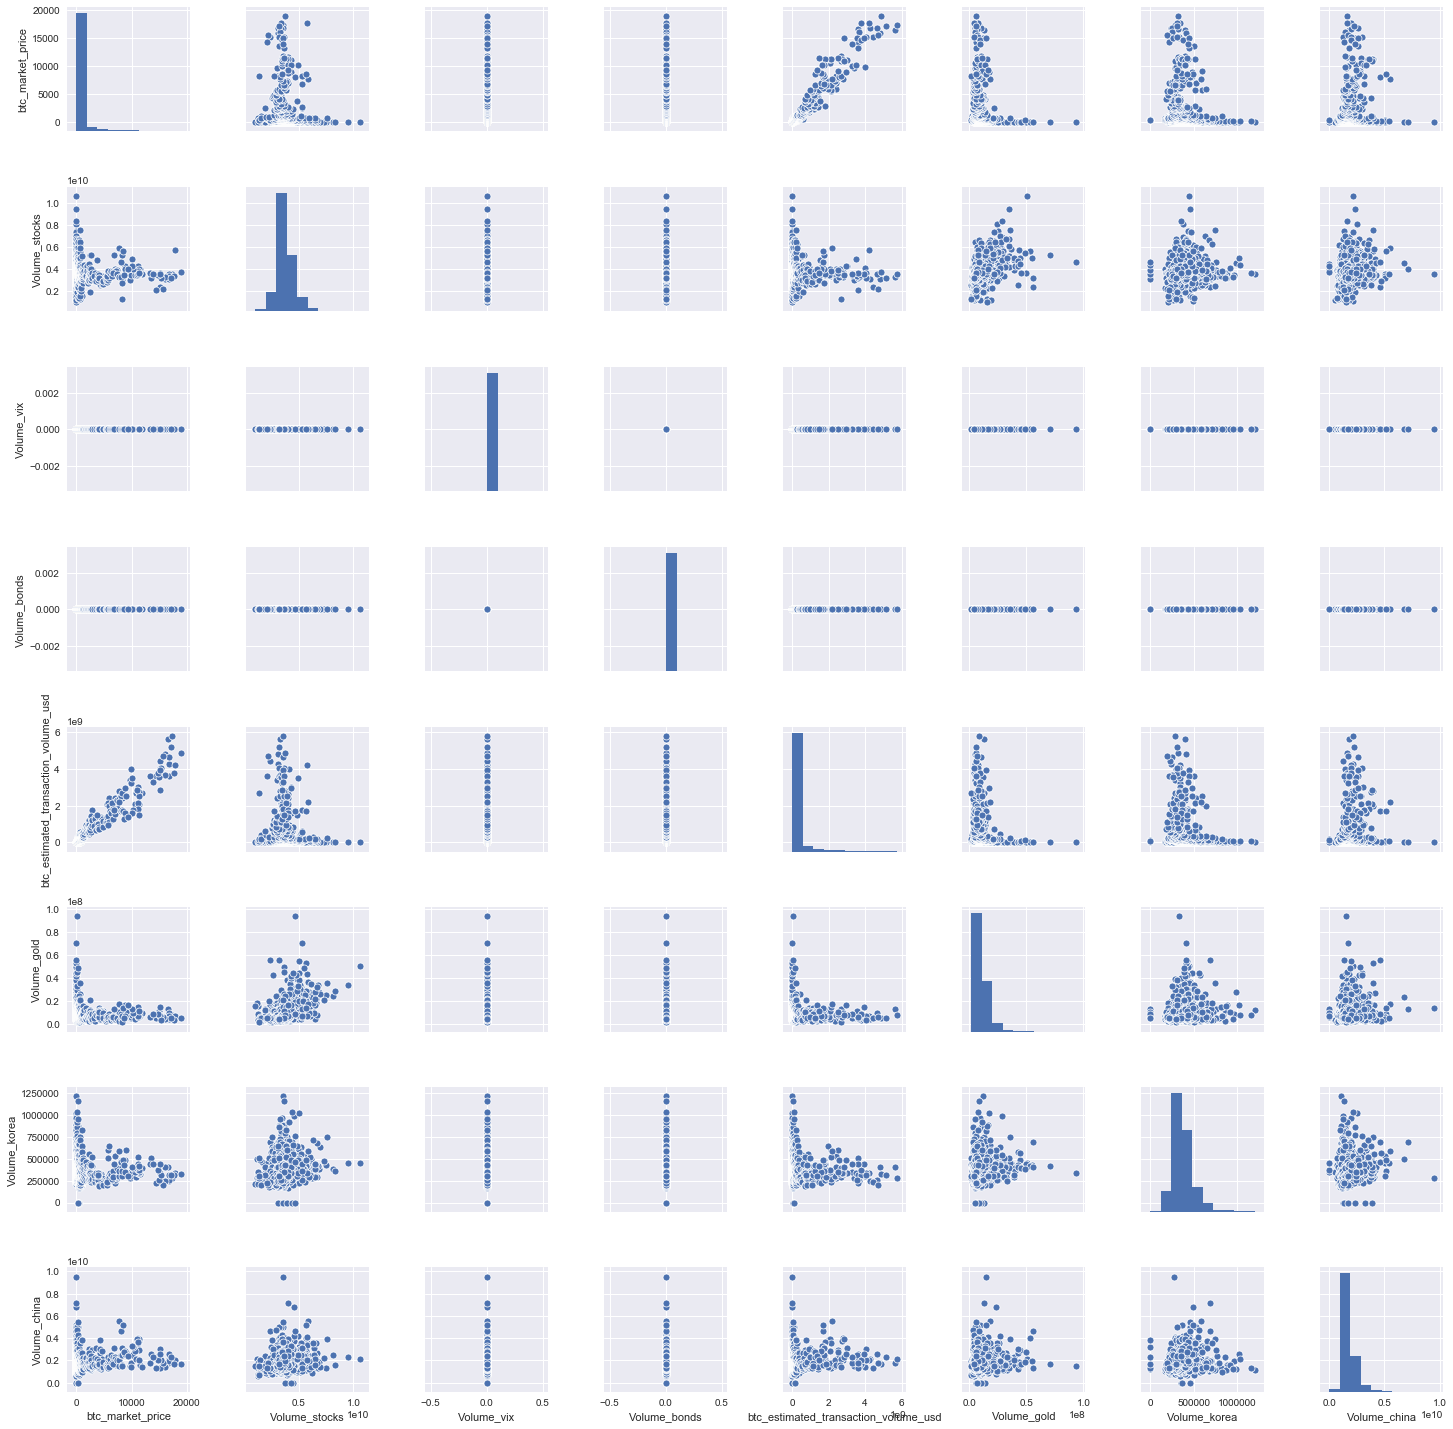

In [303]:
sns.pairplot(vol)

In [266]:
electric=pd.read_excel('table_5_02.xlsx')

In [268]:
fed=pd.read_csv('FRB_H3.csv')